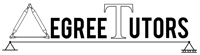
<center>www.DegreeTutors.com</center>

In [1]:
#DEPENDENCIES
import math #Basic math functionality
import numpy as np #Numpy for working with arrays 
import sympy as sym #Sympy for symbolic math

## Evaluate [B] (symbolically)

\begin{equation}
[B] = 
\begin{bmatrix}
1 & 0 \\
0 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
J
\end{bmatrix}^{-1}
\begin{Bmatrix}
\frac{\delta}{\delta r}\\
\frac{\delta}{\delta s}
\end{Bmatrix}
\begin{Bmatrix}
H_1
\end{Bmatrix} + 
\begin{bmatrix}
0 & 0 \\
0 & 1 \\
1 & 0
\end{bmatrix}
\begin{bmatrix}
J
\end{bmatrix}^{-1}
\begin{Bmatrix}
\frac{\delta}{\delta r}\\
\frac{\delta}{\delta s}
\end{Bmatrix}
\begin{Bmatrix}
H_2
\end{Bmatrix}
\end{equation}

### Step 1: State nodal coords in terms of natural coords, x(r,s), y(r,s) 

In [2]:
#Define symbols
s = sym.Symbol("s")
r = sym.Symbol("r")

#Define shape functions
h1 = 0.25*(1+r)*(1+s)
h2 = 0.25*(1-r)*(1+s)
h3 = 0.25*(1-r)*(1-s)
h4 = 0.25*(1+r)*(1-s)

#Define nodal coordinates
x1 = 9 #Top right
x2 = 2 #Top left
x3 = 2 #Btm left
x4 = 12#Btm right

y1 = 11 #Top right
y2 = 11 #Top left
y3 = 2  #Btm left
y4 = 4  #Btm right

#Element coords in terms of nodal coords using shape functions 
x = x1*h1 + x2*h2 + x3*h3 + x4*h4
y = y1*h1 + y2*h2 + y3*h3 + y4*h4

#Attempt to simplify the expressions
x = sym.simplify(x)
y = sym.simplify(y)

print('x(r,s) = ' + str(x))
print('')
print('y(r,s) = ' + str(y))

x(r,s) = -0.75*r*s + 4.25*r - 0.75*s + 6.25

y(r,s) = -0.5*r*s + 0.5*r + 4.0*s + 7.0


### Step 2: Calculate the Jacobian matrix, $[J]$

\begin{equation}
[J] = \begin{bmatrix}
\frac{\delta x}{\delta r} & \frac{\delta y}{\delta r} \\
\frac{\delta x}{\delta s} & \frac{\delta y}{\delta s}
\end{bmatrix}
\end{equation}

In [3]:
#Calculate the components of the Jacobian
dxdr = sym.diff(x,r)
dxds = sym.diff(x,s)
dydr = sym.diff(y,r)
dyds = sym.diff(y,s)

#Build the Jacobian
J = sym.Matrix([[dxdr, dydr],[dxds, dyds]])

print('The Jacobian is: ')
print('')
sym.pprint(J)

The Jacobian is: 

⎡-0.75⋅s + 4.25  -0.5⋅s + 0.5⎤
⎢                            ⎥
⎣-0.75⋅r - 0.75  -0.5⋅r + 4.0⎦


### Step 3: Calculate the inverse of the Jacobian $[J]^{-1}$

In [4]:
#Calculate the inverse
invJ = J.inv()

#Attempt to simplify
invJ = sym.simplify(invJ)

print('The inverse Jacobian is: ')
print('')
sym.pprint(invJ)

The inverse Jacobian is: 

⎡    1.0⋅(0.5⋅r - 4.0)             -0.5⋅s + 0.5      ⎤
⎢─────────────────────────  ─────────────────────────⎥
⎢1.75⋅r + 3.375⋅s - 17.375  1.75⋅r + 3.375⋅s - 17.375⎥
⎢                                                    ⎥
⎢    -(0.75⋅r + 0.75)          1.0⋅(0.75⋅s - 4.25)   ⎥
⎢─────────────────────────  ─────────────────────────⎥
⎣1.75⋅r + 3.375⋅s - 17.375  1.75⋅r + 3.375⋅s - 17.375⎦


### Step 4: Calculate the strain-displacement matrix, $[B]$

\begin{equation}
[B] = 
\begin{bmatrix}
1 & 0 \\
0 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
J
\end{bmatrix}^{-1}
\begin{Bmatrix}
\frac{\delta}{\delta r}\\
\frac{\delta}{\delta s}
\end{Bmatrix}
\begin{Bmatrix}
H_1
\end{Bmatrix} + 
\begin{bmatrix}
0 & 0 \\
0 & 1 \\
1 & 0
\end{bmatrix}
\begin{bmatrix}
J
\end{bmatrix}^{-1}
\begin{Bmatrix}
\frac{\delta}{\delta r}\\
\frac{\delta}{\delta s}
\end{Bmatrix}
\begin{Bmatrix}
H_2
\end{Bmatrix}
\end{equation}

In [5]:
#Define dH1 and dH2 (differential of H1 and H2 with respect to r and s)
dH1 = 0.25*sym.Matrix([[(1+s),0,-(1+s),0,-(1-s),0, (1-s),0],
                       [(1+r),0,(1-r),0,-(1-r),0,-(1+r),0]])

dH2 = 0.25*sym.Matrix([[0,(1+s),0,-(1+s),0,-(1-s),0, (1-s)],
                       [0,(1+r),0,(1-r),0,-(1-r),0,-(1+r)]])

#Evaluate B
B = sym.Matrix([[1,0],[0,0],[0,1]])*invJ*dH1 + sym.Matrix([[0,0],[0,1],[1,0]])*invJ*dH2

#Attempt to simplify
B = sym.simplify(B)

print('The strain-displaceent matrix [B] is: ')
print('')
sym.pprint(B)

print('')
print('Shape of [B] is ' + str(B.shape))


The strain-displaceent matrix [B] is: 

⎡1.0⋅(0.25⋅r - 1.125⋅s - 0.875)                                    -0.25⋅r + 0
⎢──────────────────────────────                0                   ───────────
⎢  1.75⋅r + 3.375⋅s - 17.375                                       1.75⋅r + 3.
⎢                                                                             
⎢                                      -(1.25⋅r + 1.25)                       
⎢              0                   ─────────────────────────                  
⎢                                  1.75⋅r + 3.375⋅s - 17.375                  
⎢                                                                             
⎢      -(1.25⋅r + 1.25)          1.0⋅(0.25⋅r - 1.125⋅s - 0.875)  1.0⋅(1.25⋅r +
⎢  ─────────────────────────     ──────────────────────────────  ─────────────
⎣  1.75⋅r + 3.375⋅s - 17.375       1.75⋅r + 3.375⋅s - 17.375       1.75⋅r + 3.

.875⋅s + 1.125                                           0.875⋅(-s + 1)       
───────────

**<sub>Copyright &copy; 2021, S.P.Carroll. All rights reserved</sub>**